In [1]:
from datetime import date
print(date.today())

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime 

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

os.listdir('data/')

['air-pollution-in-seoul.zip', 'videogamesales.zip']

In [4]:
path = 'data/'
dat = pd.read_csv(path+'videogamesales.zip')

In [5]:
dat.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
dat.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
for i in dat.columns:
    miss_rate = (dat[i].isna().sum() / dat.shape[0]) * 100
    if miss_rate > 0: 
        print(f"The missing rate of {i} is : {round(miss_rate,2)} %")

The missing rate of Year is : 1.63 %
The missing rate of Publisher is : 0.35 %


Here the missing rate are not crictical. For instance, Year has 1.63% and Publisher has 0.35%. 

In [8]:
dat.dropna(how='any', inplace=True)
dat.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
dat.info() # only one thing to fix it: year float -> int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
dat['Year'] = dat['Year'].astype(int)
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null int32
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


Now that it is clean, let's explore.

In [11]:
dat['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Genre

Text(0.5, 1, 'Genre Ratio')

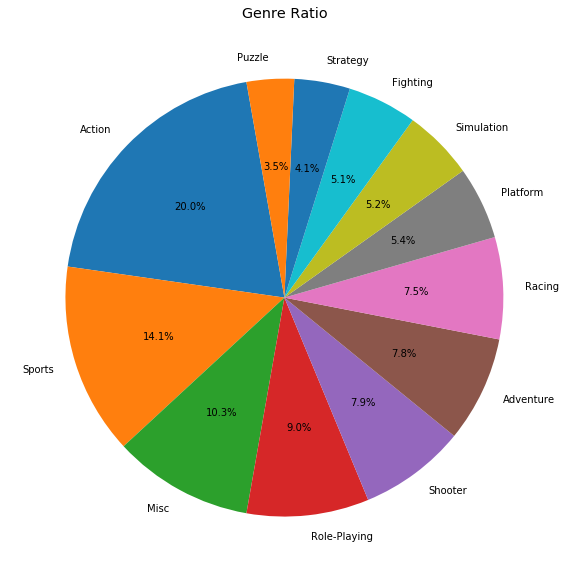

In [12]:
fig = plt.figure(figsize=(8,8))

labeles = dat['Genre'].value_counts().index.tolist()
sizes = dat['Genre'].value_counts().tolist()
plt.pie(sizes, 
       labels=labeles, 
       #colors= colors, 
       startangle= 100,
       autopct='%1.1f%%')

plt.tight_layout()

plt.title('Genre Ratio', 
          fontdict=None, 
          position = [0.5,1],
          size = 'x-large'
         )


Number of title published by Year

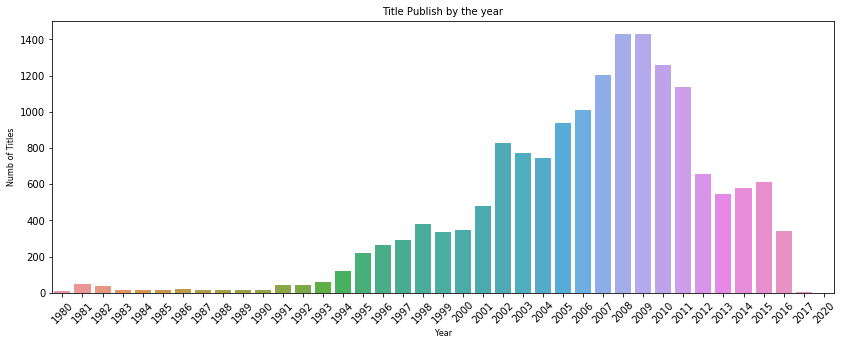

In [13]:
year_data = dat['Year'].value_counts().reset_index()

year_data = year_data.rename(columns = {'Year' :'count', 'index': 'year'})
year_data.sort_values('year')

fig = plt.subplots(figsize = (14,5))
sns.barplot(data=year_data, x='year', y= 'count')
plt.title("Title Publish by the year", fontsize=10)
plt.xlabel("Year", fontsize=8)
plt.xticks(rotation=45)
plt.ylabel("Numb of Titles", fontsize=8)
plt.show()

Global Sales by all Platform between 2013 and 2016

<Figure size 720x432 with 0 Axes>

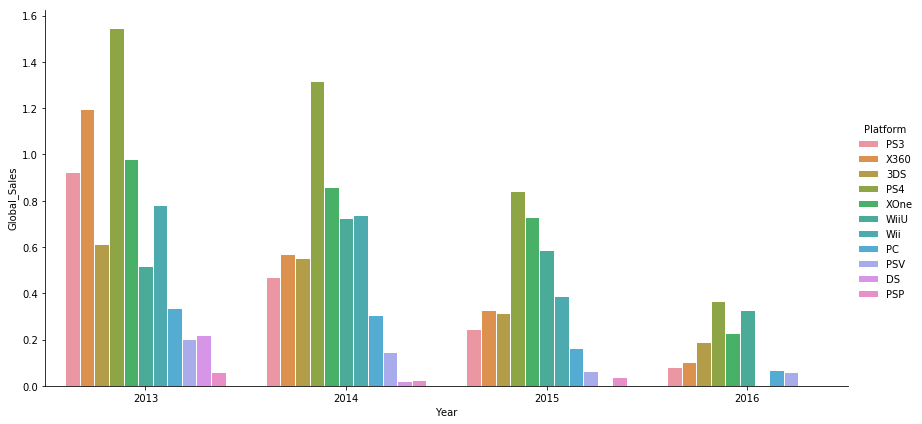

In [14]:
# 2013-2016 
first_filter=dat.Year>2012
second_filter=dat.Year<2017
new_data=dat[first_filter&second_filter]

plt.figure(figsize=(10,6))
sns.catplot(x="Year",y="Global_Sales",kind="bar",
            hue="Platform",
            data=new_data,
            edgecolor='White',
            height=6, aspect=12/6,ci=None)
plt.show()

Genre by Year

In [29]:
data1=dat[['Year','Genre','Global_Sales']]
data1.set_index("Year")

test = dat.groupby(['Year','Genre'])['Global_Sales'].sum()
test

Year  Genre       
1980  Action           0.34
      Fighting         0.77
      Misc             2.71
      Shooter          7.07
      Sports           0.49
1981  Action          14.84
      Platform         6.93
      Puzzle           2.24
      Racing           0.48
      Shooter         10.04
      Simulation       0.45
      Sports           0.79
1982  Action           6.52
      Misc             0.87
      Platform         5.03
      Puzzle          10.03
      Racing           1.57
      Shooter          3.79
      Sports           1.05
1983  Action           2.86
      Adventure        0.40
      Misc             2.14
      Platform         6.93
      Puzzle           0.78
      Shooter          0.48
      Sports           3.20
1984  Action           1.85
      Misc             1.45
      Platform         0.69
      Puzzle           3.14
                      ...  
2014  Shooter         66.00
      Simulation       5.55
      Sports          46.66
      Strategy         0.99
2

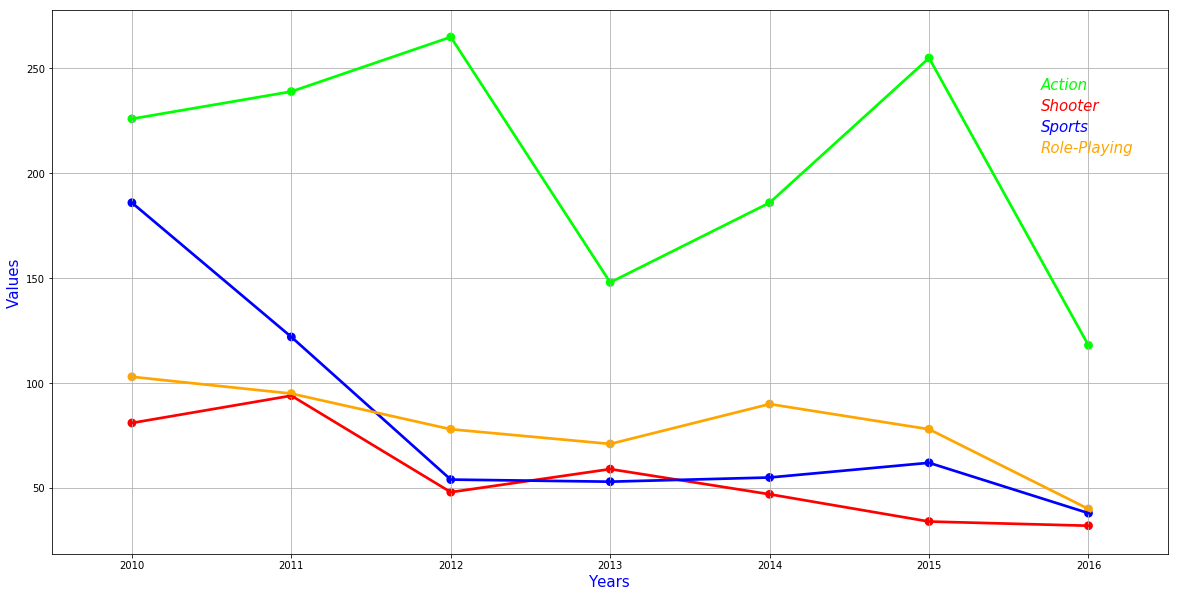

In [16]:
data1=dat[['Year','Genre','Global_Sales']]
data1=data1.set_index('Year')
data2010=[]
data2010.append([sum(data1.loc[2010].Genre=='Shooter'),sum(data1.loc[2010].Genre=='Sports'), sum(data1.loc[2010].Genre=='Action'),sum(data1.loc[2010].Genre=='Role-Playing')])
data2010.append([sum(data1.loc[2011].Genre=='Shooter'),sum(data1.loc[2011].Genre=='Sports'), sum(data1.loc[2011].Genre=='Action'),sum(data1.loc[2011].Genre=='Role-Playing')])
data2010.append([sum(data1.loc[2012].Genre=='Shooter'),sum(data1.loc[2012].Genre=='Sports'), sum(data1.loc[2012].Genre=='Action'),sum(data1.loc[2012].Genre=='Role-Playing')])
data2010.append([sum(data1.loc[2013].Genre=='Shooter'),sum(data1.loc[2013].Genre=='Sports'), sum(data1.loc[2013].Genre=='Action'),sum(data1.loc[2013].Genre=='Role-Playing')])
data2010.append([sum(data1.loc[2014].Genre=='Shooter'),sum(data1.loc[2014].Genre=='Sports'), sum(data1.loc[2014].Genre=='Action'),sum(data1.loc[2014].Genre=='Role-Playing')])
data2010.append([sum(data1.loc[2015].Genre=='Shooter'),sum(data1.loc[2015].Genre=='Sports'), sum(data1.loc[2015].Genre=='Action'),sum(data1.loc[2015].Genre=='Role-Playing')])
data2010.append([sum(data1.loc[2016].Genre=='Shooter'),sum(data1.loc[2016].Genre=='Sports'), sum(data1.loc[2016].Genre=='Action'),sum(data1.loc[2016].Genre=='Role-Playing')])

df=pd.DataFrame(data2010,columns = ['Shooter' , 'Sports', 'Action','Role-Playing'])
df['Year']=[2010,2011,2012,2013,2014,2015,2016]

#visual

f,ax1 = plt.subplots(figsize =(20,10))

sns.pointplot(x='Year',y='Action',data=df,color='lime',alpha=0.7)
sns.pointplot(x='Year',y='Shooter',data=df,color='red',alpha=0.7)
sns.pointplot(x='Year',y='Sports',data=df,color='blue',alpha=0.7)
sns.pointplot(x='Year',y='Role-Playing',data=df,color='orange',alpha=0.7)


plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.text(5.7,240,'Action',color='lime',fontsize = 15,style = 'italic')
plt.text(5.7,230,'Shooter',color='red',fontsize = 15,style = 'italic')
plt.text(5.7,220,'Sports',color='blue',fontsize = 15,style = 'italic')
plt.text(5.7,210,'Role-Playing',color='orange',fontsize = 15,style = 'italic')
plt.grid()

Text(0.5, 1.0, 'Console Counts')

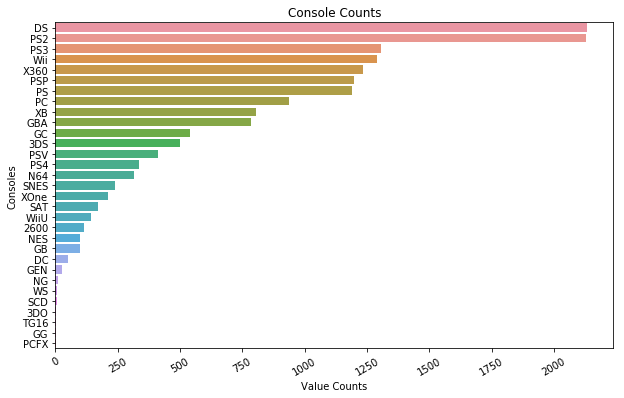

In [47]:
plt.figure(figsize=(10,6))
platform = dat['Platform'].value_counts().sort_values(ascending = False)
platform.head()
sns.barplot(y = platform.index, x = platform.values, orient = 'h')
plt.xlabel("Value Counts")
plt.ylabel('Consoles')
plt.xticks(rotation = 30)
plt.title('Console Counts')

In [48]:
dat.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [56]:
top_10 = dat.loc[:9, :]
top_10.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [19]:
# I am only interested in Xbox vs PS. And, will treat X360, XB, XOne as the same. Likely for PS1~4, PSV,and PSP

xbox_dat = dat.loc[dat['Platform'].apply(lambda x:x in ['X360', 'XB', 'XOne'])]
ps_dat = dat.loc[dat['Platform'].apply(lambda x:x in ['PS', 'PS1', 'PS2', 'PS4', 'PSP','PSV'])]

print(f"There are {len(set(xbox_dat['Name']))} numbers of titles published for 'Xbox'")
print(f"There are {len(set(ps_dat['Name']))} numbers of titles published for 'Play Station'")

There are 2102 numbers of titles published for 'Xbox'
There are 4904 numbers of titles published for 'Play Station'


How many titles are published for both Xbox and PS?

In [20]:
# first get the uniq titles from either xbox or ps
titles = ps_dat['Name'].unique()
overlappings = xbox_dat.loc[xbox_dat['Name'].apply(lambda x:x in titles)].shape[0]
print(f"There are {overlappings} number of titles that are published for both Xbos and PS")

There are 1095 number of titles that are published for both Xbos and PS


What are the TOP 10 popular titles for each console?
Here, Popular is defined by rank.

In [21]:
xbox_dat.sort_values(by=['Rank'], ascending= True)['Name'][:10]

15                Kinect Adventures!
23                Grand Theft Auto V
29    Call of Duty: Modern Warfare 3
31           Call of Duty: Black Ops
35        Call of Duty: Black Ops II
36    Call of Duty: Modern Warfare 2
43                            Halo 3
51               Grand Theft Auto IV
61              Call of Duty: Ghosts
62                       Halo: Reach
Name: Name, dtype: object

In [22]:
xbox_dat['new_Rank'] = xbox_dat['Rank'].rank()

In [23]:
ps_dat.sort_values(by=['Rank'])['Name'][:10]

17    Grand Theft Auto: San Andreas
24      Grand Theft Auto: Vice City
28           Gran Turismo 3: A-Spec
33        Call of Duty: Black Ops 3
38             Grand Theft Auto III
44               Grand Theft Auto V
47                   Gran Turismo 4
52                     Gran Turismo
66                Final Fantasy VII
69                   Gran Turismo 2
Name: Name, dtype: object

In [24]:
ps_dat['new_Rank'] = ps_dat['Rank'].rank()
ps_dat.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,new_Rank
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,1.0
24,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,2.0
28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,3.0
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,4.0
38,39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,5.0


Among the titles that are published for both console. How are they look like in terms of Global Sales?

In [25]:
ps_dat[ps_dat['Name'].apply(lambda x:x in titles)].sort_values(by= ['Global_Sales'], ascending = False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,new_Rank
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,1.0
24,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,2.0
28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,3.0
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,4.0
38,39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,5.0
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,6.0
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66,7.0
52,53,Gran Turismo,PS,1997,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95,8.0
66,67,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,9.0
69,70,Gran Turismo 2,PS,1999,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49,10.0


In [26]:
xbox_dat[xbox_dat['Name'].apply(lambda x:x in titles)].sort_values(by= ['Global_Sales'], ascending = False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,new_Rank
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,2.0
61,62,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72,2.63,0.04,0.82,10.21,9.0
72,73,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20,13.0
101,102,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.30,18.0
185,186,FIFA Soccer 13,X360,2012,Action,Electronic Arts,1.08,3.48,0.03,0.58,5.18,30.0
193,194,Call of Duty: Advanced Warfare,XOne,2014,Shooter,Activision,3.21,1.53,0.01,0.38,5.13,32.0
197,198,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08,33.0
237,238,Guitar Hero III: Legends of Rock,X360,2007,Misc,Activision,3.19,0.92,0.01,0.42,4.53,37.0
256,257,FIFA 14,X360,2013,Sports,Electronic Arts,0.92,2.93,0.01,0.46,4.31,39.0
257,258,Call of Duty: Advanced Warfare,X360,2014,Shooter,Activision,2.75,1.18,0.00,0.37,4.31,40.0


In [27]:
ps_dat['Publisher'].value_counts().reset_index()

,index,Publisher
0,Sony Computer Entertainment,554
1,Electronic Arts,406
2,Namco Bandai Games,351
3,Konami Digital Entertainment,338
4,Activision,193
5,Tecmo Koei,190
6,Ubisoft,166
7,THQ,157
8,Sega,156
9,Capcom,123
